<a href="https://colab.research.google.com/github/frankthairu/Financial_dataset-analysis/blob/main/Copy_of_Francis_Thairu_Financial_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Explaratory Data Analysis: Univariate Analysis,Bivariate Analysis and Multivariate Analysis



# Introduction

The has been slow growth in economic and human development sector. One of the main reasons for this is the lack of access of banks among African countries. Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion.Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.



1.  Specifying the Data Analytic Question

We are tasked with predicting which individuals use banks mostlt and also come up with some solutions to increase the usage of financial institutions.

We will be using data from 4 countries which are all neighboring each other in order to perform our analysis.


2.  Defining the Metric for Success

In order to perform a successful analysis we first need to perform univariate analysis which will help us understand more about the important variables individually. This way, when we perform other analysis, we will be able to understand better. We we also be doing bivariate analysis and multivariate analysis inorder to understand the relationship with the variables.

3.  Understanding the context

The dataset we wll be using is a financial dataset which was recorded within a period of two years i.e 2018 and 2019. Its a dataset that was collected from four countries; Kenya, Rwanda, Uganda and Tanzania. Its also crucial to note that this are neighbouring countries which makes it posiible for us to explain our findings. We also have various variables such as age, job description, gender, level of education, marital status etc. 

4.  Recording the Experimental Design
Below are the steps i took to implement this solution

a) Business Understanding: This sheds light to the context of the business question that we are trying to answer hence keep the focus during the data analysis so that we meet the intended objective.

b) Reading the data: Reading our data with and aim to understand the variables and observations.

c) Checking our data: This to get details about the dataset, the number of records, the statistal summary,the datatypes in our dataset among others.

d) Data cleaning, I performed all my data cleaning and preparation to make my data ready for analysis. The dataset we will be using is in the link below

 http://bit.ly/FinancialDataset

e) EDA, the data was analysed and visualized.

f) Implementing the solution using Linear discriminant analaysis and CPA

g) Challenged the solution.

h)Conclusion

5.  Data Relevance
This data was not collected long ago and so its relevent to our analysis.






# Importing libraries


In [3]:
#importing the libraries we need for our analysis
#
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns



# Reading the Data


In [4]:
# Loading the Data from the source i.e. csv
# ---
# Dataset url =  http://bit.ly/FinancialDataset
# 
finance_df=pd.read_csv("http://bit.ly/FinancialDataset")
finance_df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [5]:
# Determining the no. of records in our dataset
#
finance_df.shape

(23524, 13)

In [6]:
# Previewing the top of our dataset
#
finance_df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [7]:
# Previewing the bottom of our dataset
#
finance_df.tail(10)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23514,Uganda,2018,uniqueid_2107,No,Urban,Yes,NaN,24.0,Female,Spouse,Married/Living together,Primary education,Self employed
23515,Uganda,2018,uniqueid_2108,No,Rural,No,NaN,16.0,Male,Parent,Single/Never Married,Primary education,Other Income
23516,Uganda,2018,uniqueid_2109,No,Urban,Yes,NaN,35.0,Male,Head of Household,Married/Living together,Primary education,Self employed
23517,Uganda,2018,uniqueid_2110,No,Urban,Yes,NaN,16.0,Male,Parent,Single/Never Married,Primary education,Other Income
23518,Uganda,2018,uniqueid_2111,No,Rural,Yes,NaN,20.0,Female,Child,Single/Never Married,Primary education,No Income
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


We immediately note that we have null values

In [8]:
# Checking whether each column has an appropriate datatype
#
finance_df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [9]:
#we get more information and datatypes about our dataset 
#
finance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


# Tydying our Dataset

In [10]:
#we check for the no of duplicates
#
finance_df.duplicated().sum()

0

Since we have no duplicates we leave it 
at that


In [11]:
#renaming column names
#
finance_df.rename(columns={'Type of Location': 'location_type',
                   'Has a Bank account': 'bank_account',
                   'Cell Phone Access': 'location_type',
                   'Respondent Age': 'age_of_respondent',
                   'The relathip with head': 'relationship_with_head',
                   'Level of Educuation': 'education_level',
                   'Type of Job': 'job_type'},
          inplace=True, errors='raise')


we rename column names to match with the definitions in the definitions dataset in order for our work to be neat

In [12]:
#Dropping columns that are irrelevent 
#
finance_df.drop(['uniqueid',], axis = 1, inplace = True) 

Dropping unque id column name since its just the same as the index column .

In [13]:
#We check the sum of null values
#
finance_df.isnull().sum().sum()


267

In [14]:
#we drop the rows with the null values 
#
finance_df.dropna(inplace=True)

We drop the rows in order to reduce chances of bias in our analysis. We also drop the rows since its dangerous to replace the null value with other values.

In [201]:
#we check to see if the rows with null values were dropped
#since we had null values in the last rows of our columnd
#
finance_df.tail(10)

,country,year,bank_account,location_type,location_type,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
23508,Uganda,2018,No,Rural,Yes,6,65,Female,Head of Household,Widowed,Primary education,Self employed
23509,Uganda,2018,No,Rural,No,4,20,Female,Spouse,Married/Living together,Primary education,Other Income
23510,Uganda,2018,No,Rural,Yes,4,30,Female,Spouse,Married/Living together,No formal education,Other Income
23511,Uganda,2018,No,Rural,No,6,19,Female,Parent,Single/Never Married,Secondary education,No Income
23512,Uganda,2018,No,Rural,No,2,57,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23519,Uganda,2018,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,No,Rural,Yes,10,20,Male,Child,Single/Never Married,Secondary education,No Income


In [244]:
#We change the string type of our dataset from float to integer
#
finance_df['household_size']=finance_df['household_size'].astype(int)
finance_df['age_of_respondent']=finance_df['age_of_respondent'].astype(int)
finance_df.head()

,country,year,bank_account,location_type,location_type,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [245]:
#we check the info in our dataset
#
finance_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23343 entries, 0 to 23523
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23343 non-null  object
 1   year                    23343 non-null  int64 
 2   bank_account            23343 non-null  object
 3   location_type           23343 non-null  object
 4   location_type           23343 non-null  object
 5   household_size          23343 non-null  int64 
 6   age_of_respondent       23343 non-null  int64 
 7   gender_of_respondent    23343 non-null  object
 8   relationship_with_head  23343 non-null  object
 9   marital_status          23343 non-null  object
 10  education_level         23343 non-null  object
 11  job_type                23343 non-null  object
dtypes: int64(3), object(9)
memory usage: 2.3+ MB


# Exporting our cleaned Dataset

In [19]:
#We export our cleaned dataset into a csv file
#
finance_df.to_csv('New_financial_dataset.csv',index=False, header=True)

In [20]:
#reading our new dataset and viewing the first 5 rows
#
df=pd.read_csv("New_financial_dataset.csv")
df.tail(10)

,country,year,bank_account,location_type,location_type.1,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
23333,Uganda,2018,No,Rural,Yes,6,65,Female,Head of Household,Widowed,Primary education,Self employed
23334,Uganda,2018,No,Rural,No,4,20,Female,Spouse,Married/Living together,Primary education,Other Income
23335,Uganda,2018,No,Rural,Yes,4,30,Female,Spouse,Married/Living together,No formal education,Other Income
23336,Uganda,2018,No,Rural,No,6,19,Female,Parent,Single/Never Married,Secondary education,No Income
23337,Uganda,2018,No,Rural,No,2,57,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23338,Uganda,2018,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23339,Uganda,2018,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23340,Uganda,2018,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23341,Uganda,2018,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23342,Uganda,2018,No,Rural,Yes,10,20,Male,Child,Single/Never Married,Secondary education,No Income


# 1. Explaratory Data Analysis: Univariate Analysis

In [21]:
#Getting the numeric features description of new dataset
#
df.describe()

,year,household_size,age_of_respondent
count,23343.000000,23343.000000,23343.000000
mean,2016.980594,3.688643,38.805509
std,0.901740,2.281184,16.519803
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


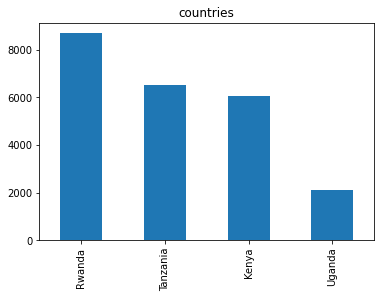

In [22]:
#checking the frequency of countries we have and plotting a bar graph
#
df.country.value_counts().plot(kind="bar",title="countries");

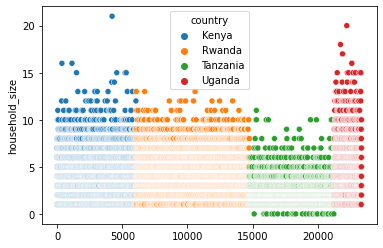

In [25]:
#we can also perform a variet scatterplot with variabbles country and household size

sns.scatterplot(x=df.index,y=df['household_size'],hue=df['country'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


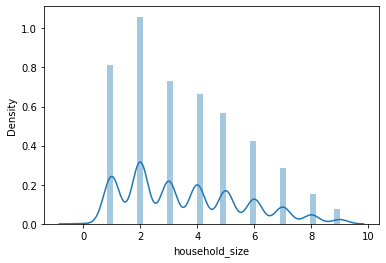

In [133]:
#we create a histogram of househod size
#
sns.distplot(df.household_size.dropna());

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


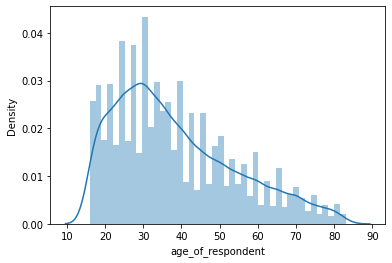

In [132]:
#we create a histogram of the age of respondnents
#
sns.distplot(df.age_of_respondent.dropna());

# Categorical Variables

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


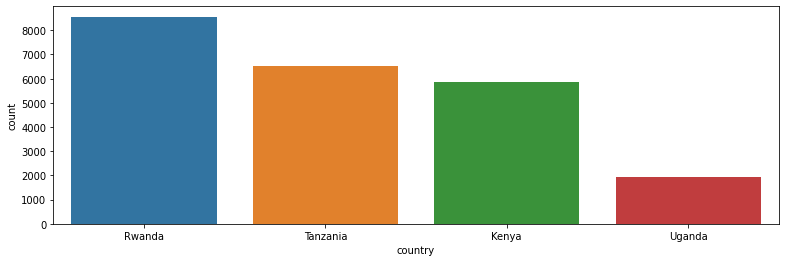

In [153]:
#we create a countplot for the countries
#
plt.figure(figsize=(13, 4))
sns.countplot(df.country.dropna(), order = df.country.value_counts().index);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


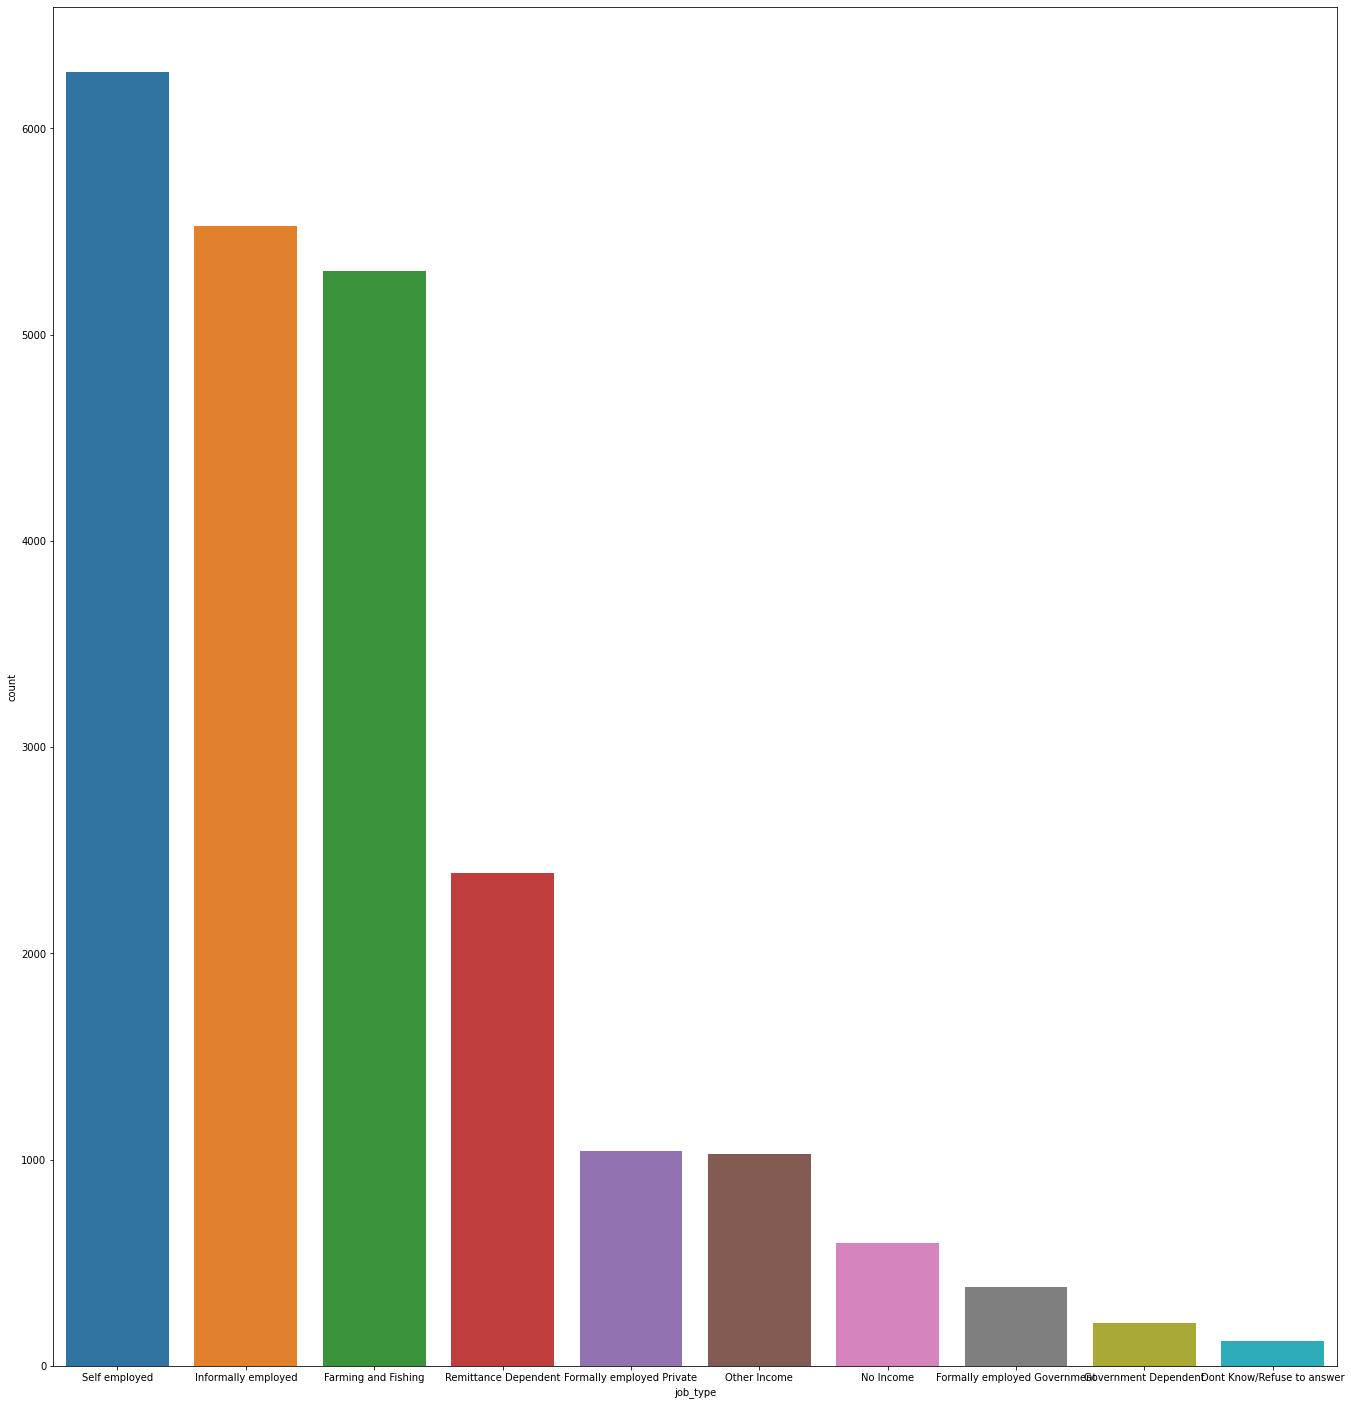

In [152]:
#we create a countplot for the joub types
#
plt.figure(figsize=(23,25))
sns.countplot(df.job_type.dropna(), order = df.job_type.value_counts().index);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


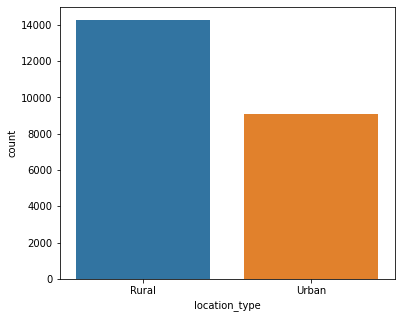

In [ ]:
#we create a counplot for location type
#
plt.figure(figsize=(6, 5))
sns.countplot(df.location_type.dropna(), order = df.location_type.value_counts().index);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


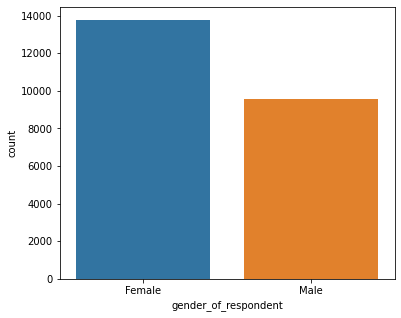

In [ ]:
#we create a count plot for grender of respondent
#
plt.figure(figsize=(6, 5))
sns.countplot(df.gender_of_respondent.dropna(), order = df.gender_of_respondent.value_counts().index);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


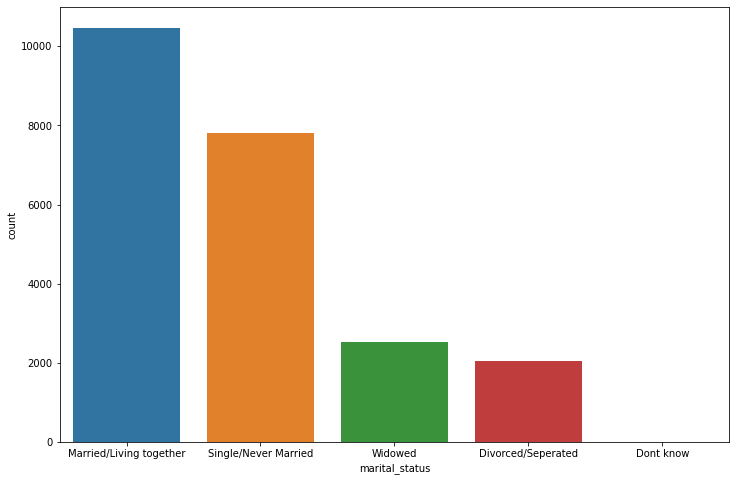

In [157]:
#we create a countplot for marital status column
#
plt.figure(figsize=(12, 8))
sns.countplot(df.marital_status.dropna(), order = df.marital_status.value_counts().index);

# Univariate Conclusion

The dataset is comprehensive with some of the data missing from different columns. We had to drop the rows from our dataset in order to visualize what we have in a more realistic manner


After performing several univariate visualizations we can be able to make the following conclusions about our dataset that will help us to perform different anlysis;

1. We can see that most of the data collected came from Rwanda.
2. We can also see that most people that participated in the research were married or living together.
3. We can see that most of the people who participated in the research were females.
4. We can see that most of the data came from the rural areas.
5. We can see that most of the people who participated in the reasearch were employed.



# Exploratoy Data Analysis:Bivariate Analysis



In [171]:
#Reading the Data
#
#Dataset url = http://bit.ly/New_financial_dataset.csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df2 =pd.read_csv("New_financial_dataset.csv")
df2.head()

,country,year,bank_account,location_type,location_type.1,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


# Checking the Data

In [172]:
# Determining the no. of records in our dataset
#
df2.shape

(23343, 12)

In [173]:
# Previewing the top of our dataset
#
df2.head()

,country,year,bank_account,location_type,location_type.1,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [174]:
# Previewing the bottom of our dataset
#
df2.tail()

,country,year,bank_account,location_type,location_type.1,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
23338,Uganda,2018,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23339,Uganda,2018,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23340,Uganda,2018,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23341,Uganda,2018,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23342,Uganda,2018,No,Rural,Yes,10,20,Male,Child,Single/Never Married,Secondary education,No Income


In [175]:
# Checking whether each column has an appropriate datatype
#
df2.dtypes

country                   object
year                       int64
bank_account              object
location_type             object
location_type.1           object
household_size             int64
age_of_respondent          int64
gender_of_respondent      object
relationship_with_head    object
marital_status            object
education_level           object
job_type                  object
dtype: object

# Data Tydying

We will not be doing alot of cleaning the dataset since we are using the new dataset we alraedy cleaned.


# Exploratory Analysis

In [177]:
#obtaining the statistical analysis in our dataset
#
df2.describe()

,year,household_size,age_of_respondent
count,23343.000000,23343.000000,23343.000000
mean,2016.980594,3.688643,38.805509
std,0.901740,2.281184,16.519803
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


In [178]:
#we want to check the pearson correlation between string types objects
#i.e bank account and location type
#then we find the correlation 

df2['bank_account']=df2['bank_account'].astype('category').cat.codes
df2['location_type']=df2['location_type'].astype('category').cat.codes
df2['realtionship_with_head']=df2['relationship_with_head'].astype('category').cat.codes
df2['marital_status']=df2['marital_status'].astype('category').cat.codes
df2['education_level	']=df2['education_level'].astype('category').cat.codes
df2['job_type']=df2['job_type'].astype('category').cat.codes


In [188]:
# Calculating the pearson coefficient
#
pearson_coeff = df2["household_size"].corr(df2["age_of_respondent"], method="pearson") 
print(pearson_coeff)



-0.11970919507762415


In [190]:
pearson_coeff = df2["bank_account"].corr(df2["location_type"], method="pearson") 
print(pearson_coeff)

0.088731371231783


In [191]:
#we need to know the correraltion between the bank accounts and the age of respondents

pearson_coeff = df2["bank_account"].corr(df2["age_of_respondent"], method="pearson") 
print(pearson_coeff)


0.01964467227121254


In [192]:
#this is a summary analysis of the correlation coefficients in the datasets

corr = df2.corr()

corr.style.background_gradient(cmap='coolwarm')

,year,bank_account,location_type,household_size,age_of_respondent,marital_status,job_type,realtionship_with_head,education_level
year,1.000000,0.109946,0.204277,-0.048902,-0.019062,-0.026290,0.250132,0.001978,0.167485
bank_account,0.109946,1.000000,0.088731,-0.023050,0.019645,-0.038855,-0.063235,-0.069969,0.322940
location_type,0.204277,0.088731,1.000000,-0.274053,-0.047647,0.079271,0.367255,0.016426,0.127404
household_size,-0.048902,-0.023050,-0.274053,1.000000,-0.119709,-0.110986,-0.180291,0.088651,-0.008248
age_of_respondent,-0.019062,0.019645,-0.047647,-0.119709,1.000000,0.221753,-0.103203,-0.150320,-0.352995
marital_status,-0.026290,-0.038855,0.079271,-0.110986,0.221753,1.000000,0.055197,-0.142725,-0.122349
job_type,0.250132,-0.063235,0.367255,-0.180291,-0.103203,0.055197,1.000000,0.040500,0.044413
realtionship_with_head,0.001978,-0.069969,0.016426,0.088651,-0.150320,-0.142725,0.040500,1.000000,-0.017648
education_level,0.167485,0.322940,0.127404,-0.008248,-0.352995,-0.122349,0.044413,-0.017648,1.000000


The correlation values from our correlation matrix table has all the types of correlation. When the value is 1 or the value is greater than zero and as nearer to 1, then it shows positive correlation. If the value is less than zero and as closes to -1 then it shows a negative correlation. If the value is 0, then there is no correlation at all. 

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


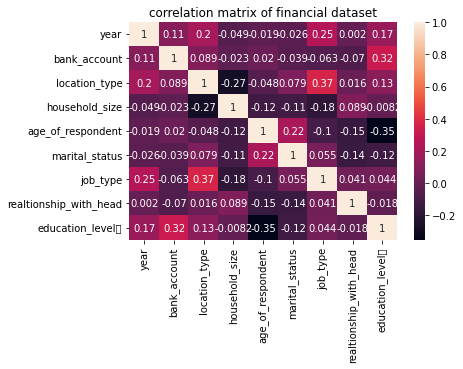

In [193]:
#we can also show the correlation in our dataset using a heatmap as follow
#
heatmp = sns.heatmap(df2.corr(), annot = True)

heatmp.set(title = "correlation matrix of financial dataset")

plt.show()

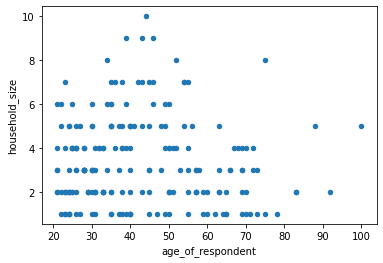

In [195]:
#we also create a scatter plot of age and household size to see the relation
#
df2[df2['age_of_respondent']>20].sample(200).plot.scatter(x='age_of_respondent', y='household_size')

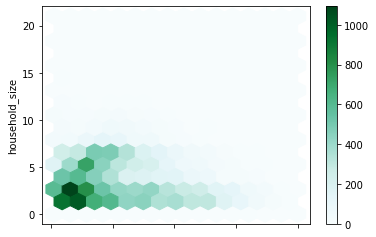

In [200]:
#we create a hex plot which is not much difference from above scatter plot
#but it gives a clear insight.
df2[df2['age_of_respondent']>20].plot.hexbin(x='age_of_respondent', y='household_size', gridsize=15)

We can see that the household size clusters around size 3 and age of respondents cluster around age 20-30.

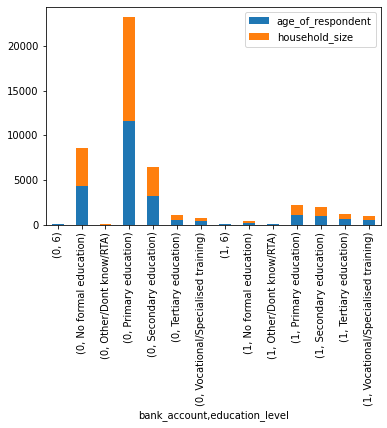

In [199]:
#we create a stacked bar graph that shows us the relation between bank accounts,education level wrt age of respondent 
#and household size
#
df_2=df2.groupby(['bank_account','education_level']).count()[['age_of_respondent','household_size']]

df_2.plot.bar(stacked=True)

Here we can see that pepole who reached their education at primary level and those with no formal education  are many.

We can also see that the same number of people who stopped at primary schools and those with no formal education are the same ones with less bank accunts.

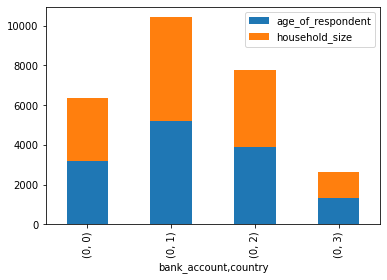

In [187]:
#We create a stacked bar graph that shows the relation between bank account and country wrt 
#age of respondent and household size.
#
df_3=df3.groupby(['bank_account','country']).count()[['age_of_respondent','household_size']]

df_3.plot.bar(stacked=True)

Here we can observe that rwanda is leading with most people having no bank accounts.

We can also see that in a summary, all countries have people who have no bank accounts, compared to those with bank accounts.

# Conclusion

In our bivariate data analysis of the financial dataset, we first started by removing the outliers in order to increase the classiffication accuracy which ultimately leads to overal efficiency in our analysis.

We were also able to find out the following:

1. The leading county in our analysis which is Rwanda also had the highest number of people with no bank accounts.

2. We can also be able to see that all the countries had high no of people with no bank accounts compared to those wuth bank accounts.

3. We can also see that the people who reached their education at primary levels and those with no education at all are also leading with no bank accounts.


# Recommendantions

After our analysis  we were able to come up with some recommendations:

1. Banks should offer more education to people in oyrder for them to be able to know the banks exixst and the priveleges of having bank accounts.

2. Banks in Rwanda should find ways to make their citizens aware of what banks are and the imoportance of having bank accounts.

# Multivariate Analysis

# Importing the libraries

In [222]:
#we import the libraries we need in our analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Reading our Dataset

In [223]:
#Reading the Data
#
#Dataset url = http://bit.ly/New_financial_dataset.csv
#we use the dataset that we had already cleaned in our univariate analysis
#
sns.set_style()
df =pd.read_csv("New_financial_dataset.csv")
df.head()

,country,year,bank_account,location_type,location_type.1,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


# Checking the dataset

In [224]:
# Determining the no. of records in our dataset
#
df.shape

(23343, 12)

In [225]:
#previewing the first rows of our dataset
#
df.head()

,country,year,bank_account,location_type,location_type.1,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [226]:
#checking the last rows im our dataset
#
df.tail()

,country,year,bank_account,location_type,location_type.1,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
23338,Uganda,2018,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23339,Uganda,2018,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23340,Uganda,2018,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23341,Uganda,2018,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23342,Uganda,2018,No,Rural,Yes,10,20,Male,Child,Single/Never Married,Secondary education,No Income


In [227]:
#getting the more information on our dataset including the data types .
#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23343 entries, 0 to 23342
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23343 non-null  object
 1   year                    23343 non-null  int64 
 2   bank_account            23343 non-null  object
 3   location_type           23343 non-null  object
 4   location_type.1         23343 non-null  object
 5   household_size          23343 non-null  int64 
 6   age_of_respondent       23343 non-null  int64 
 7   gender_of_respondent    23343 non-null  object
 8   relationship_with_head  23343 non-null  object
 9   marital_status          23343 non-null  object
 10  education_level         23343 non-null  object
 11  job_type                23343 non-null  object
dtypes: int64(3), object(9)
memory usage: 2.1+ MB


# Tyding Dataset

In [228]:
# Dropping unnecessary columns 
# 
df.drop(['location_type.1'],axis=1,inplace=True)


In [229]:
#we change the data types from string in order to perform analysis.
#
df['bank_account']=df['bank_account'].astype('category').cat.codes
df['location_type']=df['location_type'].astype('category').cat.codes
df['relationship_with_head']=df['relationship_with_head'].astype('category').cat.codes
df['marital_status']=df['marital_status'].astype('category').cat.codes
df['education_level']=df['education_level'].astype('category').cat.codes
df['job_type']=df['job_type'].astype('category').cat.codes
df['gender_of_respondent']=df['gender_of_respondent'].astype('category').cat.codes
df['country']=df['country'].astype('category').cat.codes

In [230]:
#obtaining the statistical analysis in our dataset
#
df2.describe()

,year,bank_account,location_type,household_size,age_of_respondent,marital_status,job_type,realtionship_with_head,education_level\t
count,23343.000000,23343.000000,23343.000000,23343.000000,23343.000000,23343.000000,23343.000000,23343.000000,23343.000000
mean,2016.980594,0.141241,0.388939,3.688643,38.805509,2.392537,5.425352,2.215996,2.994645
std,0.901740,0.348278,0.487520,2.281184,16.519803,0.997860,3.089847,1.893657,1.208854
min,2016.000000,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,0.000000,0.000000,2.000000,26.000000,2.000000,2.000000,1.000000,3.000000
50%,2017.000000,0.000000,0.000000,3.000000,35.000000,2.000000,5.000000,1.000000,3.000000
75%,2018.000000,0.000000,1.000000,5.000000,49.000000,3.000000,9.000000,5.000000,4.000000
max,2056.000000,1.000000,1.000000,21.000000,100.000000,4.000000,9.000000,5.000000,6.000000




# Performing P.C.A Analysis

In [231]:
# Step 3: Preprocessing
# The first preprocessing step is to divide the dataset into a feature set and corresponding labels. 
# 
X = df.drop('bank_account', 1)
y = df['bank_account']

In [232]:
# Step 4: Splitting the dataset into the Training set and Test set
# Next we divide data into training and test sets. 
#
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [233]:
# Step 5: Normalization 
# We will perform standard scalar normalization to normalize our feature set. 
# 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [234]:
# step 6
# we use Python's Scikit-Learn library. 
# We initialize the PCA class by passing the number of components to the constructor.
# We call the fit and then transform methods by passing the feature set to these methods. 
# The transform method returns the specified number of principal components.

# 
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [242]:
# Step 7: Explained Variance Ratio
# The PCA class contains explained_variance_ratio_ which returns the variance caused by each of the principal components. 
# We execute the following line of code to find the "explained variance ratio".
# 
explained_variance = pca.explained_variance_ratio_

# The explained_variance variable is now a float type array which contains variance ratios for each principal component. 
# The values for the explained_variance variable looks like what is shown in the output. 
# 
explained_variance

array([0.18944645, 0.15839059, 0.15249488])

In [236]:
# Step 8: Using 1 Principal Component
# Let's first try to use 1 principal component to train our algorithm. To do so, execute the following code:
# 
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

KeyboardInterrupt: ignored

In [237]:
# Step 9: Training and Making Predictions
# In this case we'll use random forest classification for making the predictions.
# 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [238]:
# Step 10: Performance Evaluation
# 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))
#we can see that there is 85.84& accuracy.
#

[[4008    0]
 [ 661    0]]
Accuracy 0.8584279288926965


In [239]:
# Step 11: Results with 2 Principal Components
# Now let's try to evaluate classification performance of the random forest algorithm 
# with 2 principal components. 
#
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Here the number of components for PCA has been set to 2. 
# The classification results with 2 components are as shown in the output.
# With two principal components the classification accuracy decreases to 83.33% compared to 93.33% for 1 component.

In [240]:
# Step 12: Results with 2 Principal Components
# we now write code to evaluate clasification performance of the 
# random forest algorithm with 3 principal components.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca = PCA(n_components=3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# With three principal components the classification accuracy should again increase to 93.33%
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [241]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[4008    0]
 [ 661    0]]
Accuracy 0.8584279288926965


# Conclusion
From our analysis in the multivariate case, we have achieved optimal level of accuracy while significantly reducing the number of features in the dataset. We can see that the accuarcies are the same even when using different features.